In [1]:
%pip install -q pandas matplotlib numpy

Note: you may need to restart the kernel to use updated packages.


In [2]:
import json
with open('output/cpu.json') as f:
    cpu_cluster = json.load(f)
with open('output/buf.json') as f:
    buf_cluster = json.load(f)
with open('output/usm.json') as f:
    usm_cluster = json.load(f)
with open('output/simd.json') as f:
    simd_cluster = json.load(f)

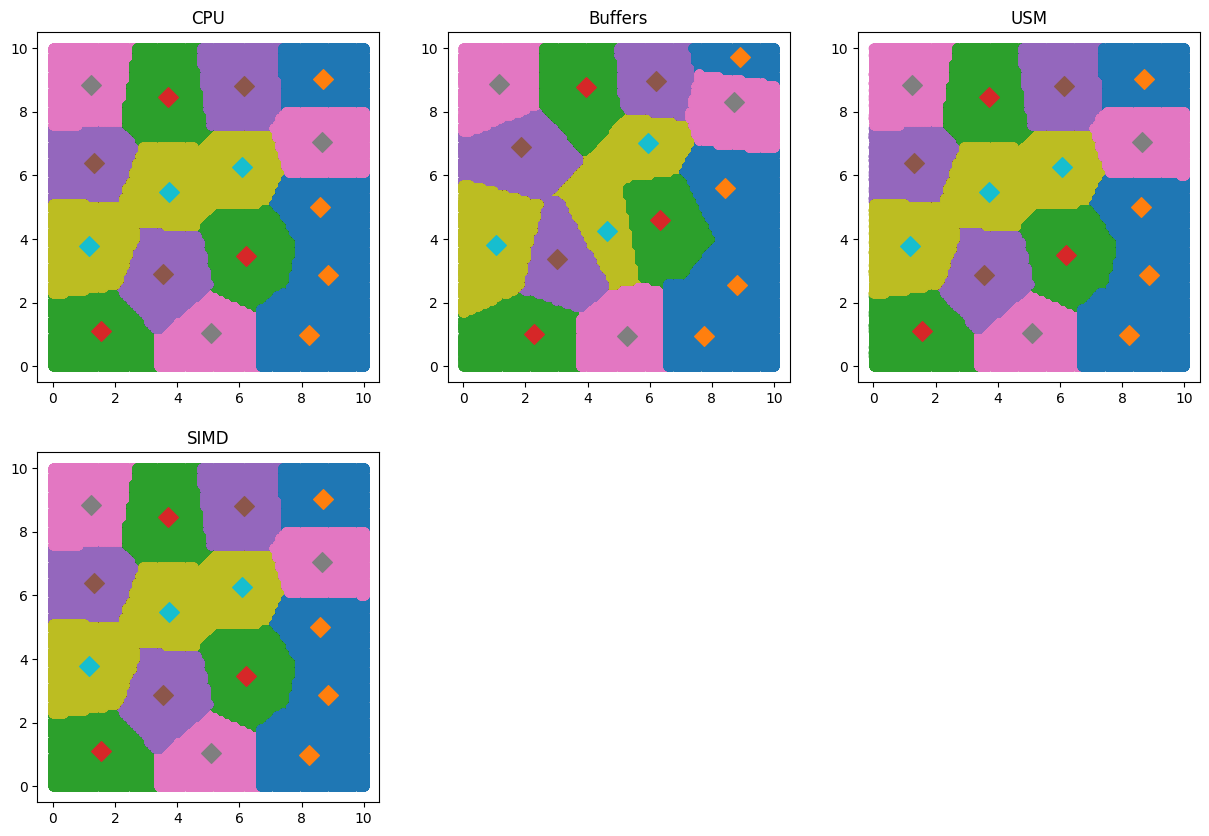

In [3]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(15, 10))

def plot_cluster(subplot, title, clusters):
    ax = fig.add_subplot(subplot)
    ax.set_title(title)

    for cluster in clusters:
        centroid = cluster["c"]

        xs = [x[0] for x in cluster["a"]]
        ys = [x[1] for x in cluster["a"]]

        ax.scatter(xs, ys)
        ax.scatter(centroid[0], centroid[1], marker="D", s=100)

plot_cluster(231, "CPU",        cpu_cluster)
plot_cluster(232, "Buffers",    buf_cluster)
plot_cluster(233, "USM",        usm_cluster)
plot_cluster(234, "SIMD",       simd_cluster)

plt.show()